## HOUSE PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("kathmandudata.csv")

In [3]:
housing.head()

,bedroom,bathroom,floors,parking,location,dhur,Aana,Paisa,Daam,roadsize(feet),Road type,Years ago,Area(sq ft),Price
0,0,0,NaN,0,"Chyasingdol, Pasikot, Kathmandu",0,7.0,2.0,0.0,20.0,Soil Stabilized,2.0,2566.87,36000000
1,4,3,2.5,1,"Nearby, Buddha party palace, Imadol, Lalitpur",0,3.0,0.0,0.0,13.0,Gravelled,2.0,1026.75,18000000
2,4,3,3.0,0,"Nayabasti, Imadol, Lalitpur",0,2.0,2.0,0.0,13.0,Gravelled,2.0,855.62,15000000
3,7,5,2.0,3,"Rudreshwor, Budhanilkantha, Kathmandu",12,NaN,NaN,NaN,15.0,Blacktopped,1.0,2187.00,57000000
4,7,3,2.5,3,"Bafal, Bafal, Kathmandu",0,4.0,2.0,0.0,13.0,Blacktopped,1.0,1540.12,24500000


# Dropping unnecessary columns
1. Location is out of our scope, so it is dropped.
2. Dhur, Aana, Paisa and Daam is dropped as we have already converted them into square feet.

In [63]:
housing.drop(['bedroom','location', 'dhur', 'Aana', 'Paisa', 'Daam', 'Years ago'], axis = 1, inplace = True)

KeyError: "['location', 'dhur', 'Aana', 'Paisa', 'Daam', 'Years ago'] not found in axis"

In [ ]:
housing.head()

In [6]:
housing.loc[6]

bathroom                  0
floors                  NaN
parking                   0
roadsize(feet)         12.0
Road type         Gravelled
Area(sq ft)         1090.92
Price              11500000
Name: 6, dtype: object

In [7]:
housing['floors'].value_counts()

3.00    552
2.00    127
2.50    113
4.00     57
1.00     49
1.50     23
3.50     14
5.00      7
6.00      3
0.00      2
1.35      1
Name: floors, dtype: int64

In [8]:
housing['bathroom'].value_counts()

0    685
3    259
4    245
5    163
6     90
2     81
1     75
7     22
8      4
Name: bathroom, dtype: int64

In [9]:
housing.describe()

,bathroom,floors,parking,roadsize(feet),Area(sq ft),Price
count,1624.000000,948.000000,1624.000000,1624.000000,1624.000000,1.624000e+03
mean,2.176724,2.750369,0.998768,12.255429,1369.061418,2.659940e+07
std,2.164561,0.712053,1.310651,5.866296,663.209911,1.360174e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.800000e+06
25%,0.000000,2.500000,0.000000,12.000000,962.570000,1.700000e+07
50%,2.000000,3.000000,1.000000,13.000000,1197.870000,2.350000e+07
75%,4.000000,3.000000,2.000000,15.000000,1619.920000,3.300000e+07
max,8.000000,6.000000,8.000000,25.000000,6014.250000,7.000000e+07


In [10]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'bathroom'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'parking'}>,
        <AxesSubplot:title={'center':'roadsize(feet)'}>],
       [<AxesSubplot:title={'center':'Area(sq ft)'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

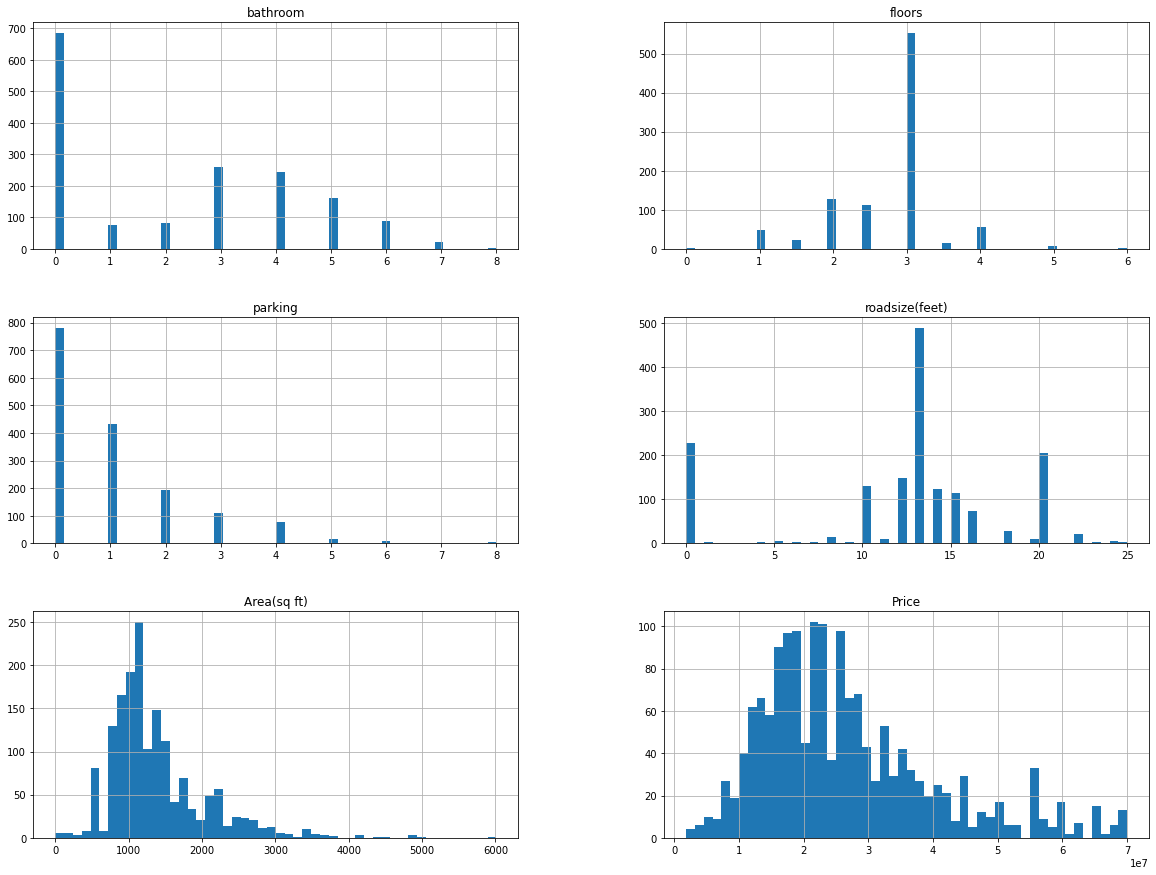

In [11]:
# # For plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathroom        1624 non-null   int64  
 1   floors          948 non-null    float64
 2   parking         1624 non-null   int64  
 3   roadsize(feet)  1624 non-null   float64
 4   Road type       1624 non-null   object 
 5   Area(sq ft)     1624 non-null   float64
 6   Price           1624 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 88.9+ KB


# Filling Missing values
1. Filling N/A values of floors


In [13]:
housing=housing.replace('N/A', np.nan)
avgfloors=housing['floors'].mean().round(0)
#avgbedroom=housing['bedroom'].mean().round(0)
print(avgfloors)


3.0


In [14]:
housing['floors'] = housing['floors'].replace(np.nan, avgfloors)
#housing['bedroom']=housing['bedroom'].replace(0,1)

In [15]:
print(housing.loc[6])

bathroom                  0
floors                  3.0
parking                   0
roadsize(feet)         12.0
Road type         Gravelled
Area(sq ft)         1090.92
Price              11500000
Name: 6, dtype: object


In [16]:
q3, q1 = np.percentile(housing['Price'], [75 ,25])
iqr=q3-q1
iqr

16000000.0

# Label Encoding: One-Hot Encoder

In [17]:
#from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
#enc = OneHotEncoder(handle_unknown='ignore')

In [18]:
#dum_df = pd.get_dummies(housing[['Road type']],prefix=["Road"] )

In [19]:
#housing = housing.join(dum_df)
#housing

# Label Encoding:

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
labelencoder = LabelEncoder()
housing['Road type'] = labelencoder.fit_transform(housing['Road type'])
housing

,bathroom,floors,parking,roadsize(feet),Road type,Area(sq ft),Price
0,0,3.0,0,20.0,5,2566.87,36000000
1,3,2.5,1,13.0,3,1026.75,18000000
2,3,3.0,0,13.0,3,855.62,15000000
3,5,2.0,3,15.0,1,2187.00,57000000
4,3,2.5,3,13.0,1,1540.12,24500000
...,...,...,...,...,...,...,...
1619,0,3.0,0,13.0,5,1112.31,18300000
1620,0,1.0,0,10.0,4,1197.87,16500000
1621,0,3.0,0,0.0,5,1711.25,27500000
1622,5,3.0,2,13.0,5,1754.03,34000000


In [22]:
housing['Road type'].value_counts()

5    700
1    411
3    408
4     83
2     19
0      3
Name: Road type, dtype: int64

In [23]:
housing['floors'].value_counts()

3.00    1228
2.00     127
2.50     113
4.00      57
1.00      49
1.50      23
3.50      14
5.00       7
6.00       3
0.00       2
1.35       1
Name: floors, dtype: int64

In [24]:
housing.head()

,bathroom,floors,parking,roadsize(feet),Road type,Area(sq ft),Price
0,0,3.0,0,20.0,5,2566.87,36000000
1,3,2.5,1,13.0,3,1026.75,18000000
2,3,3.0,0,13.0,3,855.62,15000000
3,5,2.0,3,15.0,1,2187.00,57000000
4,3,2.5,3,13.0,1,1540.12,24500000


# Normalization vs Standardization

In [25]:
# import pandas as pd
# from sklearn import preprocessing

# x = housing.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# housing = pd.DataFrame(x_scaled,columns = housing.columns)

In [26]:

# from sklearn.preprocessing import StandardScaler
# object= StandardScaler()

# # standardization 
# x_scaled= object.fit_transform(housing) 
# housing = pd.DataFrame(x_scaled,columns = housing.columns)


In [27]:
#housing.head()

## Train-Test Splitting

# Sklearn train_test_split

In [28]:
# from sklearn.model_selection import train_test_split
# train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing['bathroom']):
     strat_train_set = housing.loc[train_index]
     strat_test_set = housing.loc[test_index]

In [30]:
 strat_test_set['bathroom'].value_counts()

0    137
3     52
4     49
5     33
6     18
2     16
1     15
7      4
8      1
Name: bathroom, dtype: int64

In [31]:
strat_train_set['bathroom'].value_counts()

0    548
3    207
4    196
5    130
6     72
2     65
1     60
7     18
8      3
Name: bathroom, dtype: int64

In [32]:
# strat_train_set['bedroom'].value_counts()


## Looking for Correlations

In [33]:
corr_matrix = housing.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price             1.000000
Area(sq ft)       0.444660
bathroom          0.410562
parking           0.409572
roadsize(feet)    0.252386
floors            0.202923
Road type        -0.255826
Name: Price, dtype: float64

## Relationship

[Text(0.5, 1.0, 'Median Price of Houses'),
 Text(0.5, 0, 'Price (NRS)'),
 Text(0, 0.5, 'Bedroom')]

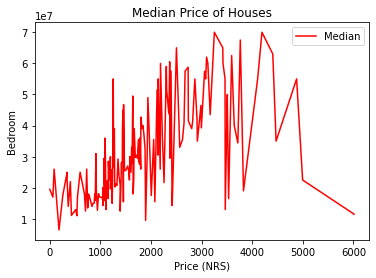

In [34]:
price_area_median = housing.groupby('Area(sq ft)').median()['Price']
price_area_median
# Create figure and subplot
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# Create plot with median data
ax1.plot(price_area_median.index, price_area_median, color='r', label='Median')
ax1.legend(loc='best')

# Adding labels to the axis and title
props1 = {'title':'Median Price of Houses',
         'xlabel':'Price (NRS)',
         'ylabel':'Bedroom'}
ax1.set(**props1)

[Text(0.5, 1.0, 'Median Price of Houses'),
 Text(0.5, 0, 'Area(sq ft)'),
 Text(0, 0.5, 'Price (NRS)')]

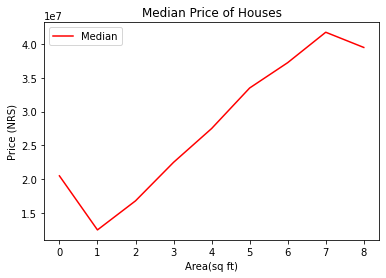

In [35]:
price_bath_median = housing.groupby('bathroom').median()['Price']
price_bath_median
# Create figure and subplot
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# Create plot with median data
ax1.plot(price_bath_median.index, price_bath_median, color='r', label='Median')
ax1.legend(loc='best')

# Adding labels to the axis and title
props1 = {'title':'Median Price of Houses',
         'xlabel':'Area(sq ft)',
         'ylabel':'Price (NRS)'}
ax1.set(**props1)

[Text(0.5, 1.0, 'Median Price of Houses'),
 Text(0.5, 0, 'Bedroom'),
 Text(0, 0.5, 'Price (NRS)')]

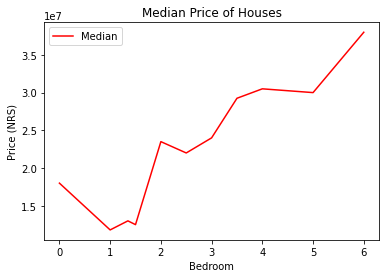

In [36]:
price_bed_median = housing.groupby('floors').median()['Price']
price_bed_median
# Create figure and subplot
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# Create plot with median data
ax1.plot(price_bed_median.index, price_bed_median, color='r', label='Median')
ax1.legend(loc='best')

# Adding labels to the axis and title
props1 = {'title':'Median Price of Houses',
         'xlabel':'Bedroom',
         'ylabel':'Price (NRS)'}
ax1.set(**props1)

In [37]:
strat_train_set.shape

(1299, 7)

In [38]:
strat_test_set.shape

(325, 7)

In [39]:
housing_tr=strat_train_set.drop("Price", axis=1)

In [40]:
housing_price=strat_train_set["Price"].copy()

In [41]:
housing_te=strat_test_set.drop("Price", axis=1)

In [42]:
housing_price_te=strat_test_set["Price"].copy()

## Selecting a desired model and training it

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
#model = DecisionTreeRegressor()
#model = RandomForestRegressor()
model.fit(housing_tr, housing_price)

LinearRegression()

In [44]:
some_data = housing_tr.iloc[:4]

In [45]:
some_labels = housing_price.iloc[:4]

In [46]:
model.predict(some_data)

array([26530653.13574686, 19157486.05696311, 31699858.98899912,
       26430150.12230903])

In [47]:
list(some_labels)

[31000000, 13600000, 19200000, 28500000]

## Evaluating the model

In [48]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_tr)
mse = mean_squared_error(housing_price, housing_predictions)
rmse = np.sqrt(mse)

In [49]:
rmse/iqr

0.6580689099702728

In [50]:

mse/iqr

6928875.044311407

## Saving the model

In [51]:
from joblib import dump, load
dump(model, 'project.joblib') 

['project.joblib']

## Testing the model on test data

In [52]:

final_predictions = model.predict(housing_te)
final_mse = mean_squared_error(housing_price_te, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [53]:
NRMSE=final_rmse/iqr
NMSE=final_mse/iqr

In [54]:
print("The Normalized Mean Squared Error and Normalized Root Mean Squared Error is",NMSE,"and",NRMSE,"respectively.")

The Normalized Mean Squared Error and Normalized Root Mean Squared Error is 7081576.449104621 and 0.6652807888922081 respectively.


# Result Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

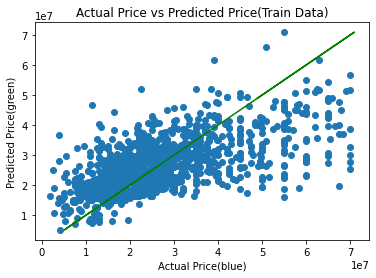

In [55]:
import matplotlib.pyplot as plot
plot.plot(housing_predictions,housing_predictions, color='green')
plot.scatter(housing_price,housing_predictions)
plot.title('Actual Price vs Predicted Price(Train Data)')
plot.xlabel('Actual Price(blue)')
plot.ylabel('Predicted Price(green)')
plot.show

<function matplotlib.pyplot.show(close=None, block=None)>

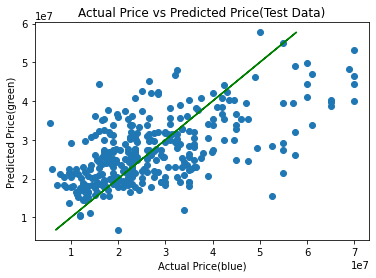

In [56]:
import matplotlib.pyplot as plot
plot.plot(final_predictions,final_predictions, color='green')
plot.scatter(housing_price_te,final_predictions)
plot.title('Actual Price vs Predicted Price(Test Data)')
plot.xlabel('Actual Price(blue)')
plot.ylabel('Predicted Price(green)')
plot.show

## Using the model

In [57]:
from joblib import dump, load
import numpy as np
model = load('project.joblib') 
features = np.array([[3,3.0,1,13.0,5,1755.75]])
y=model.predict(features)
y.round(0)


C:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([29781596.])

In [58]:
housing.columns

Index(['bathroom', 'floors', 'parking', 'roadsize(feet)', 'Road type',
       'Area(sq ft)', 'Price'],
      dtype='object')

In [59]:
3,5,3.0,2,13.0,5,1754.03

(3, 5, 3.0, 2, 13.0, 5, 1754.03)

In [60]:
def features(bathroom, floors, parking, roadsize,
    Road_type, Area):
    x = np.array([ bathroom, floors, parking, roadsize,
    Road_type, Area])
    prediction = model.predict(x.reshape(1, -1))
    return f"RS. {prediction}"

In [61]:
import gradio as gr
outputs = gr.outputs.Textbox()
a=gr.inputs.Dropdown(["1", "2", "3","4","5"])
app = gr.Interface(fn=features,description ="This model predicts the price of house in Kathmandu valley.\n\n\n\nRoad Type Index (Select a value as shown below)\n\n1=Blacktopped\n\n2=Concrete\n\n3=Gravelled\n\n4=Paved\n\n5=Soil Stabilized", inputs=['number','number','number','number',a,'number'], outputs=outputs)

In [62]:
app.launch()

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x2365fccfca0>,
 'http://127.0.0.1:7860/',
 None)

C:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavi

C:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavi